In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from aggmap import show, AggMap, loadmap
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./barcode combos.xlsx')
df = df[df.Sample !=6]

In [3]:

def _apply_newdf(x):
    return new_df.join(x.set_index('Barcode Combo')['ActualCount'])

2021-05-21 22:12:28,144 - INFO - [bidd-aggmap] - Calculating distance ...
2021-05-21 22:12:28,166 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 630/630 [00:00<00:00, 1145.23it/s]


2021-05-21 22:12:38,501 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-05-21 22:12:42,085 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-05-21 22:12:42,486 - INFO - [bidd-aggmap] - Finished


100%|##########| 5/5 [00:00<00:00, 135.61it/s]


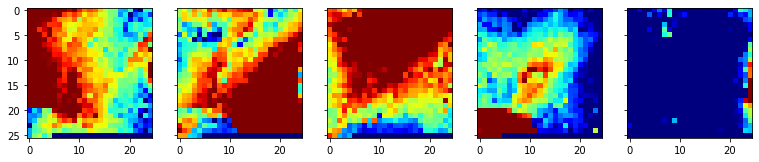

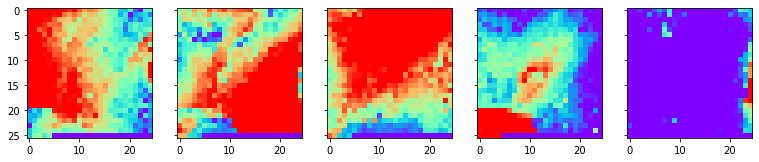

In [4]:
k=2
df2 = df[df.kMers == k]
columns = df2['Barcode Combo'].unique()

dfres=pd.DataFrame(index=df2['Barcode Combo'].unique())
for s in df2.Sample.unique():
    x = df2[df2.Sample==s].set_index('Barcode Combo')['ActualCount'].to_frame(name=s)
    dfres=dfres.join(x)
dfres = dfres.T.fillna(0)

if 5 not in dfres.index:
    dfres = dfres.T
    dfres[5] = 0
    dfres = dfres.T

scaler = StandardScaler()
dfrest = scaler.fit_transform(dfres)
dfres2 = pd.DataFrame(dfrest,index=dfres.index, columns = dfres.columns)
    
mp = AggMap(dfres2, metric = 'euclidean')
mp.fit(cluster_channels = 5, verbose=0)
X = mp.batch_transform(dfres2.values)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13, 4), sharex = True, sharey = True)
for ax, x in zip(axes, X):
    #show.imshow(x, x_max=1, vmin=0.02, mode='light', color_list= pd.Series(mp.colormaps).tolist(), ax=ax)
    ax.imshow(x.sum(axis=-1), cmap='jet')
    
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13,4), sharex = True, sharey = True)

for ax, x in zip(axes, X):
    #show.imshow(x, x_max=1, vmin=0.02, mode='light', color_list= pd.Series(mp.colormaps).tolist(), ax=ax)
    ax.imshow(x.sum(axis=-1), cmap='rainbow')

2021-05-21 22:26:38,442 - INFO - [bidd-aggmap] - Calculating distance ...
2021-05-21 22:26:40,718 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 7076/7076 [00:06<00:00, 1150.50it/s]


2021-05-21 22:46:56,415 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-05-21 22:47:13,884 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-05-21 22:49:29,707 - INFO - [bidd-aggmap] - Finished


100%|##########| 5/5 [00:00<00:00, 37.66it/s]


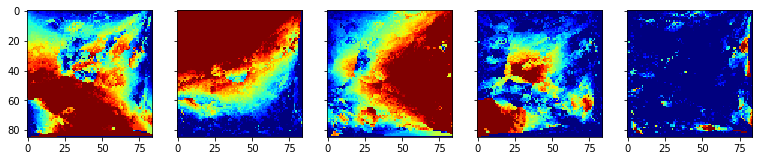

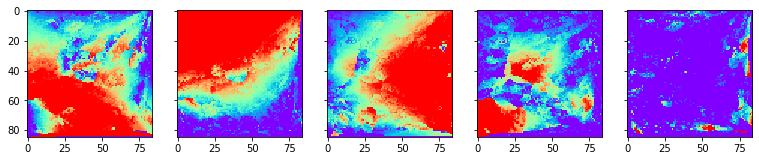

In [33]:
k=3
df2 = df[df.kMers == k]
columns = df2['Barcode Combo'].unique()

dfres=pd.DataFrame(index=df2['Barcode Combo'].unique())
for s in df2.Sample.unique():
    x = df2[df2.Sample==s].set_index('Barcode Combo')['ActualCount'].to_frame(name=s)
    dfres=dfres.join(x)
dfres = dfres.T.fillna(0)

if 5 not in dfres.index:
    dfres = dfres.T
    dfres[5] = 0
    dfres = dfres.T

scaler = StandardScaler()
dfrest = scaler.fit_transform(dfres)
dfres2 = pd.DataFrame(dfrest,index=dfres.index, columns = dfres.columns)
    
mp = AggMap(dfres2, metric = 'euclidean')
mp.fit(cluster_channels = 1, verbose=0)
X = mp.batch_transform(dfres2.values)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13, 4), sharex = True, sharey = True)
for ax, x in zip(axes, X):
    #show.imshow(x, x_max=1, vmin=0.02, mode='light', color_list= pd.Series(mp.colormaps).tolist(), ax=ax)
    ax.imshow(x.sum(axis=-1), cmap='jet')
    
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13,4), sharex = True, sharey = True)

for ax, x in zip(axes, X):
    #show.imshow(x, x_max=1, vmin=0.02, mode='light', color_list= pd.Series(mp.colormaps).tolist(), ax=ax)
    ax.imshow(x.sum(axis=-1), cmap='rainbow')

2021-05-21 22:20:28,013 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-05-21 22:20:40,129 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-05-21 22:21:31,268 - INFO - [bidd-aggmap] - Finished


100%|##########| 5/5 [00:00<00:00, 35.73it/s]


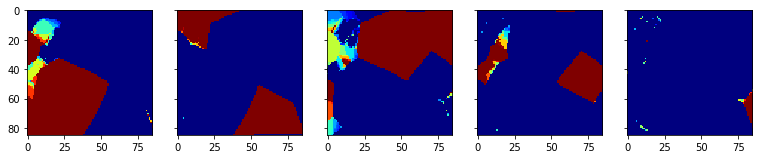

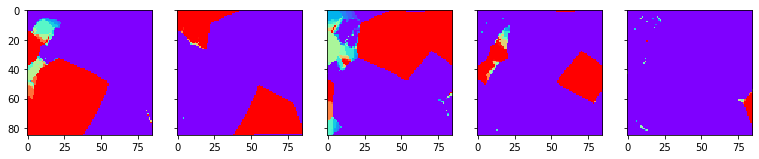

In [27]:
k=4
df2 = df[df.kMers == k]
columns = df2['Barcode Combo'].unique()

dfres=pd.DataFrame(index=df2['Barcode Combo'].unique())
for s in df2.Sample.unique():
    x = df2[df2.Sample==s].set_index('Barcode Combo')['ActualCount'].to_frame(name=s)
    dfres=dfres.join(x)
dfres = dfres.T.fillna(0)

if 5 not in dfres.index:
    dfres = dfres.T
    dfres[5] = 0
    dfres = dfres.T

scaler = StandardScaler()
dfrest = scaler.fit_transform(dfres)
dfres2 = pd.DataFrame(dfrest,index=dfres.index, columns = dfres.columns)
    
# mp = AggMap(dfres2, metric = 'euclidean')

mp = loadmap('./agg.mp')
mp.fit(emb_method = 'tsne', cluster_channels = 1, verbose=0)
X = mp.batch_transform(dfres2.values)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13, 4), sharex = True, sharey = True)
for ax, x in zip(axes, X):
    #show.imshow(x, x_max=1, vmin=0.02, mode='light', color_list= pd.Series(mp.colormaps).tolist(), ax=ax)
    ax.imshow(x.sum(axis=-1), cmap='jet')
    
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13,4), sharex = True, sharey = True)

for ax, x in zip(axes, X):
    #show.imshow(x, x_max=1, vmin=0.02, mode='light', color_list= pd.Series(mp.colormaps).tolist(), ax=ax)
    ax.imshow(x.sum(axis=-1), cmap='rainbow')

2021-05-21 23:04:32,920 - INFO - [bidd-aggmap] - Calculating distance ...
2021-05-21 23:04:32,925 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 162/162 [00:00<00:00, 1359.68it/s]


2021-05-21 23:04:33,978 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-05-21 23:04:34,312 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-05-21 23:04:34,320 - INFO - [bidd-aggmap] - Finished


100%|##########| 5/5 [00:00<00:00, 246.74it/s]


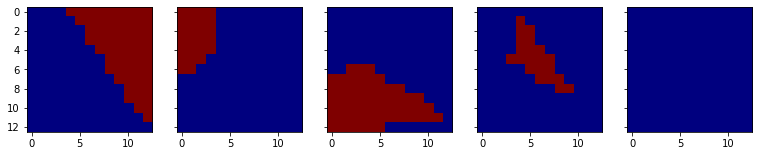

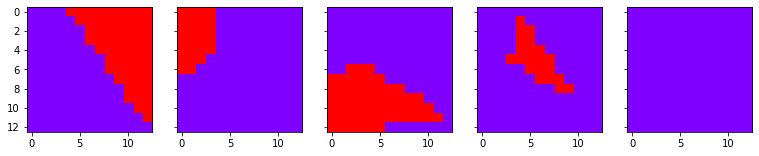

In [36]:
k=5
df2 = df[df.kMers == k]
columns = df2['Barcode Combo'].unique()

dfres=pd.DataFrame(index=df2['Barcode Combo'].unique())
for s in df2.Sample.unique():
    x = df2[df2.Sample==s].set_index('Barcode Combo')['ActualCount'].to_frame(name=s)
    dfres=dfres.join(x)
dfres = dfres.T.fillna(0)

if 5 not in dfres.index:
    dfres = dfres.T
    dfres[5] = 0
    dfres = dfres.T

scaler = StandardScaler()
dfrest = scaler.fit_transform(dfres)
dfres2 = pd.DataFrame(dfrest,index=dfres.index, columns = dfres.columns)
    
mp = AggMap(dfres2, metric = 'euclidean')

mp.fit(emb_method = 'tsne', cluster_channels = 1, verbose=0)
X = mp.batch_transform(dfres2.values)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13, 4), sharex = True, sharey = True)
for ax, x in zip(axes, X):
    #show.imshow(x, x_max=1, vmin=0.02, mode='light', color_list= pd.Series(mp.colormaps).tolist(), ax=ax)
    ax.imshow(x.sum(axis=-1), cmap='jet')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13,4), sharex = True, sharey = True)

from matplotlib.ticker import MaxNLocator




for ax, x in zip(axes, X):
    #show.imshow(x, x_max=1, vmin=0.02, mode='light', color_list= pd.Series(mp.colormaps).tolist(), ax=ax)
    ax.imshow(x.sum(axis=-1), cmap='rainbow')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))